In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
custom_style = {'axes.labelcolor': 'white',
                'xtick.color': 'white',
                'ytick.color': 'white'}
sns.set_style("darkgrid", rc=custom_style)
plt.style.use('dark_background')

from sklearn import  datasets
plt.show()

In [2]:
from sklearn import  datasets
plt.show()
iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [3]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['kinds'] = pd.DataFrame(iris.target)

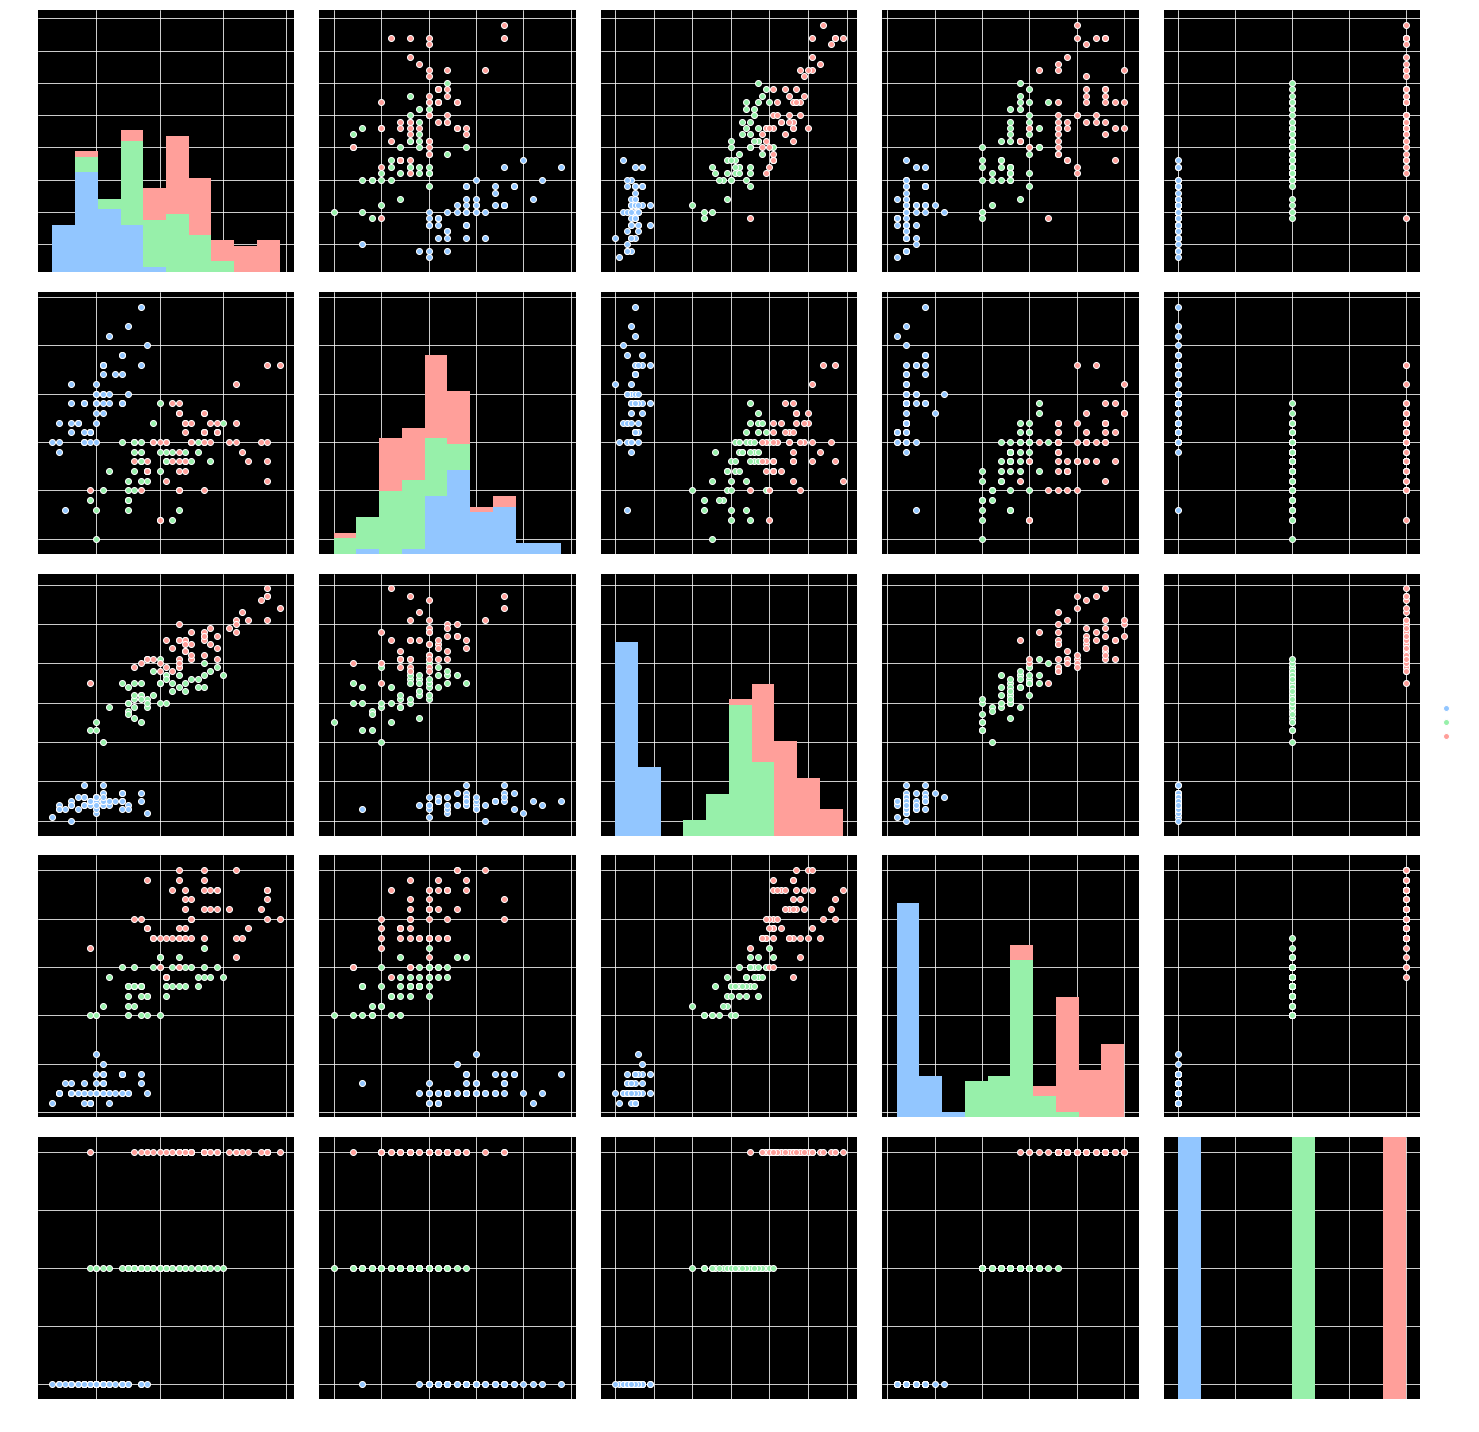

In [4]:
sns.pairplot(iris_df, hue='kinds',palette='pastel', size=4)

In [5]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', C=1.0, random_state=1)

In [6]:
svm.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

<Figure size 432x288 with 0 Axes>

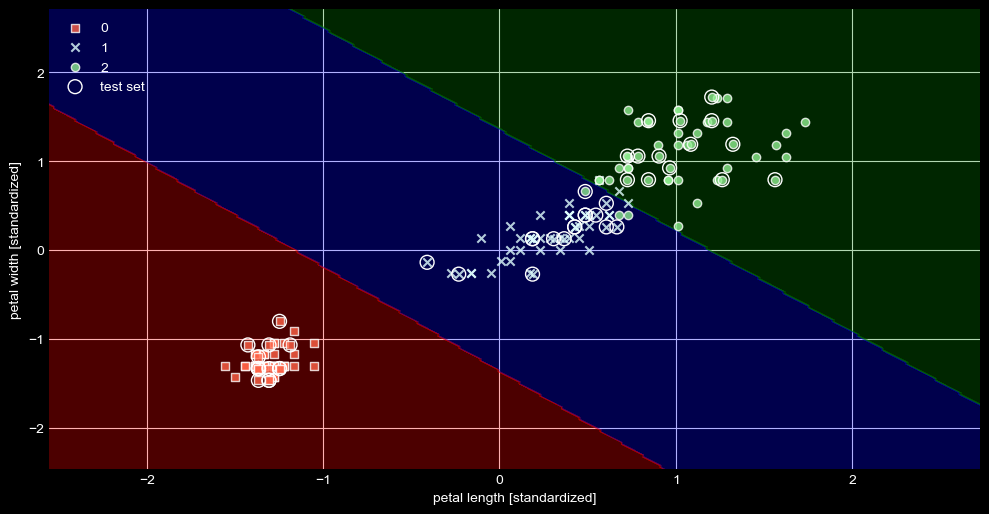

In [8]:
%run myGraph.py
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

###正則化項Cのパラメータ確認

In [11]:
weights, params, predict = [], [], []
for c in np.arange(-5,5):
    c = 10.**c
    svm = SVC(kernel = 'linear', C=c, random_state=1)
    svm.fit(X_train_std, y_train)
    weights.append(svm.coef_[1])
    params.append(c)
    
    y_pred = svm.predict(X_test_std)
    y_c = pd.DataFrame(np.c_[y_pred, y_test], columns={'predict', 'original'})
    predict.append(round((y_c['predict'] == y_c['original']).sum() / len(y_c['predict']) * 100,0))

weights = np.array(weights)

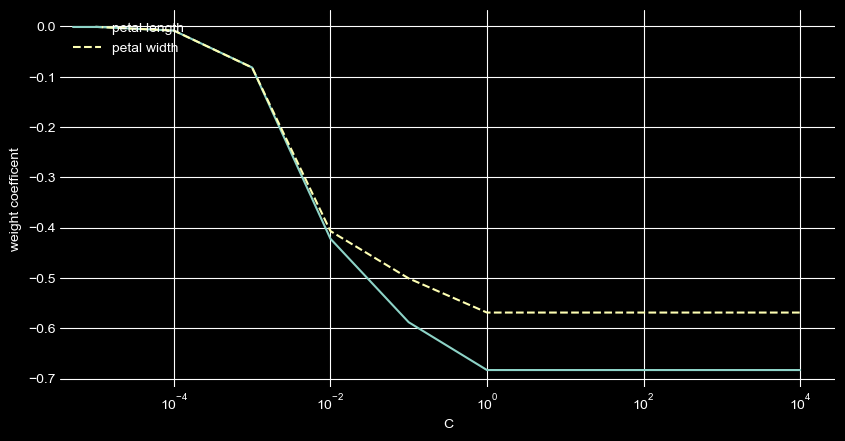

In [12]:
fig = plt.figure(figsize=(10,5),dpi=100)
ax = plt.axes()
ax.plot(params, weights[:,0], label = 'petal length')
ax.plot(params, weights[:,1], linestyle = '--', label = 'petal width')
ax.set_ylabel('weight coefficent')
ax.set_xlabel('C')
ax.legend(loc='upper left')
ax.set_xscale('log')

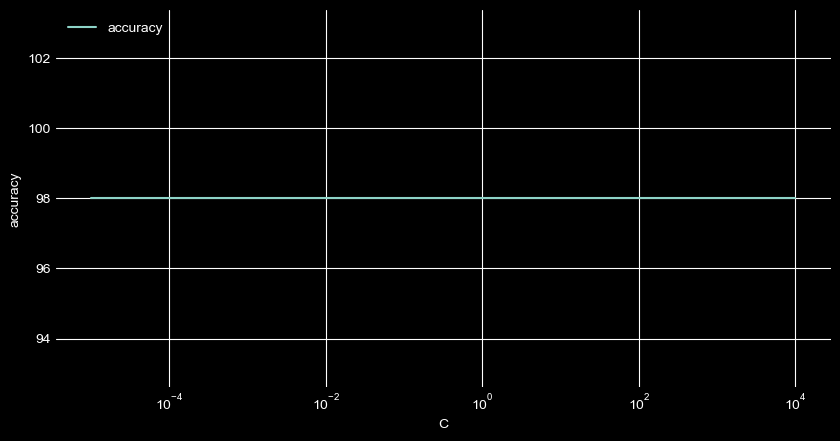

In [13]:
fig = plt.figure(figsize=(10,5),dpi=100)
ax = plt.axes()
ax.plot(params, predict, label = 'accuracy')
ax.set_ylabel('accuracy')
ax.set_xlabel('C')
ax.legend(loc='upper left')
ax.set_xscale('log')